# Parkinson's Disease Progression Prediction
### Project - SI 618: Data Manipulation and Analysis

Authors
1. Nowrin Mohamed - nowrin@umich.edu
2. Prithvijit Dasgupta - prithvid@umich.edu
3. Sachin Salim - sachinks@umich.edu

@misc{amp-parkinsons-disease-progression-prediction,
    author = {Leslie Kirsch, Sohier Dane, Stacey Adam, Victoria Dardov},
    title = {AMP®-Parkinson's Disease Progression Prediction},
    publisher = {Kaggle},
    year = {2023},
    url = {https://kaggle.com/competitions/amp-parkinsons-disease-progression-prediction}
}

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
supplemental_clinical_data = pd.read_csv('data/supplemental_clinical_data.csv')
peptides_data = pd.read_csv('data/train_peptides.csv') 
clinical_data = pd.read_csv('data/train_clinical_data.csv') 
proteins_data = pd.read_csv('data/train_proteins.csv')

# Proteins

### Feature extraction

In [3]:
proteins_features = proteins_data.pivot(index='visit_id', columns='UniProt', values='NPX')
proteins_features

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.10,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400290.0,24240.10,NaN,16943.50,6303.17,77493.6,46435.3,254247.0,138910.0,...,NaN,25690.60,NaN,6859.82,19106.7,121161.0,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.7,234094.0,82410.4,19183.7,17804.10,12277.00
942_24,NaN,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.6,256654.0,76931.9,19168.2,19215.90,14625.60


### Filling nan

Filling with average of each protein

In [4]:
# TODO: Use a better method to fill nan
proteins_features.fillna(proteins_features.mean(), inplace=True)

In [8]:
# TODO: sort the indices based on patient and visit months


0

Scaling data

In [28]:
# TODO: Is scaling necessary?

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_std = False)
# scaled_X = scaler.fit_transform(proteins_features)

# Peptides

In [39]:
peptide_features = peptides_data.pivot(index='visit_id', columns='Peptide', values='PeptideAbundance')
peptide_features

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [40]:
peptide_features.fillna(peptide_features.mean(), inplace=True)

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaled_peptide = scaler.fit_transform(peptide_features)

Keep 216 components in PCA


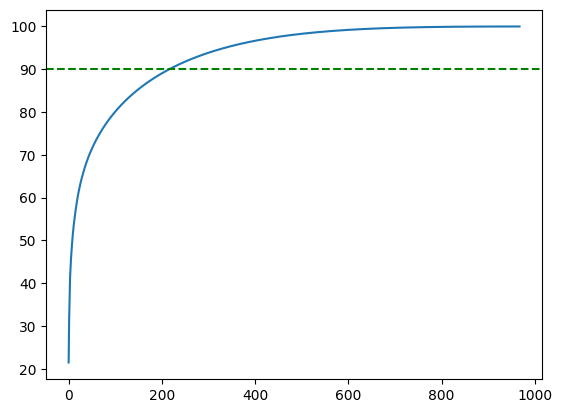

In [89]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(scaled_peptide)
cumsum_var = 100 * np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum_var)
perc_retained = 90
plt.axhline(perc_retained, color='g', linestyle='--')
print(f"Keep {np.argmax(cumsum_var > perc_retained)} components in PCA")

In [90]:
pca = PCA(n_components = 216, random_state=42)
X_pca = pca.fit_transform(scaled_peptide)
X_pca.shape

(1113, 216)

# Clinical data

In [111]:
clinical_data['visit_id'].unique().shape

(2615,)

In [108]:
print(clinical_data.shape)
print(clinical_data['patient_id'].unique().shape)

(2615, 8)
(248,)
(8,)


In [107]:
print(supplemental_clinical_data.shape)
print(supplemental_clinical_data['patient_id'].unique().shape)

(2223, 8)
(771,)
(8,)


`supplemental_clinical_data` contains patients whose proteins were never measured.

`clinical_data` patients had their proteins measured, but not on all visits

### Feature extraction

In [5]:
clinical_features = clinical_data[['visit_id', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].copy()
clinical_features

,visit_id,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,10.0,6.0,6,NaN
1,55_3,10.0,7.0,19,NaN
2,55_6,8.0,10.0,58,NaN
3,55_9,8.0,9.0,17,0.0
4,55_12,10.0,10.0,2,0.0
...,...,...,...,...,...
2610,65043_48,7.0,6.0,51,0.0
2611,65043_54,4.0,8.0,55,1.0
2612,65043_60,6.0,6.0,0,1.0
2613,65043_72,3.0,9.0,58,1.0


### Filling nan

Filling with average of each updrs

In [94]:
mean_values = clinical_features.mean(numeric_only=True).astype(int)
clinical_features.fillna(mean_values, inplace=True)
clinical_features = clinical_features.astype({'updrs_1': 'int64', 'updrs_2': 'int64', 'updrs_3': 'int64', 'updrs_4': 'int64'})
display(clinical_features.head())
display(clinical_features.dtypes)

,visit_id,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,10,6,6,1
1,55_3,10,7,19,1
2,55_6,8,10,58,1
3,55_9,8,9,17,0
4,55_12,10,10,2,0


visit_id    object
updrs_1      int64
updrs_2      int64
updrs_3      int64
updrs_4      int64
dtype: object

<AxesSubplot: ylabel='Frequency'>

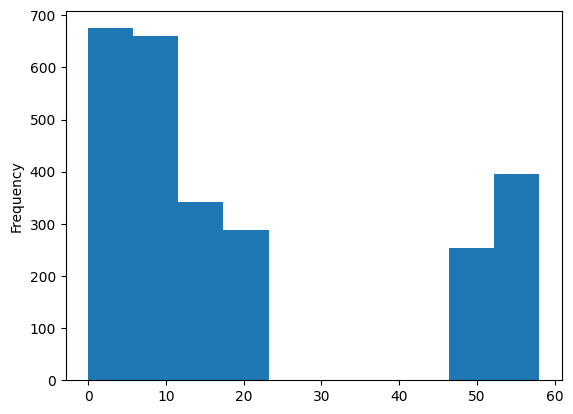

In [7]:
clinical_features['updrs_3'].plot.hist()